# Persian Spotify Analysis
Alright, listen up folks! We're about to dive into some serious data analysis and machine learning. We'll start with some EDA to get to know the data, and then we'll use machine learning to extract some juicy insights. So, let's not waste any time and get this journey started!

<div align="center">
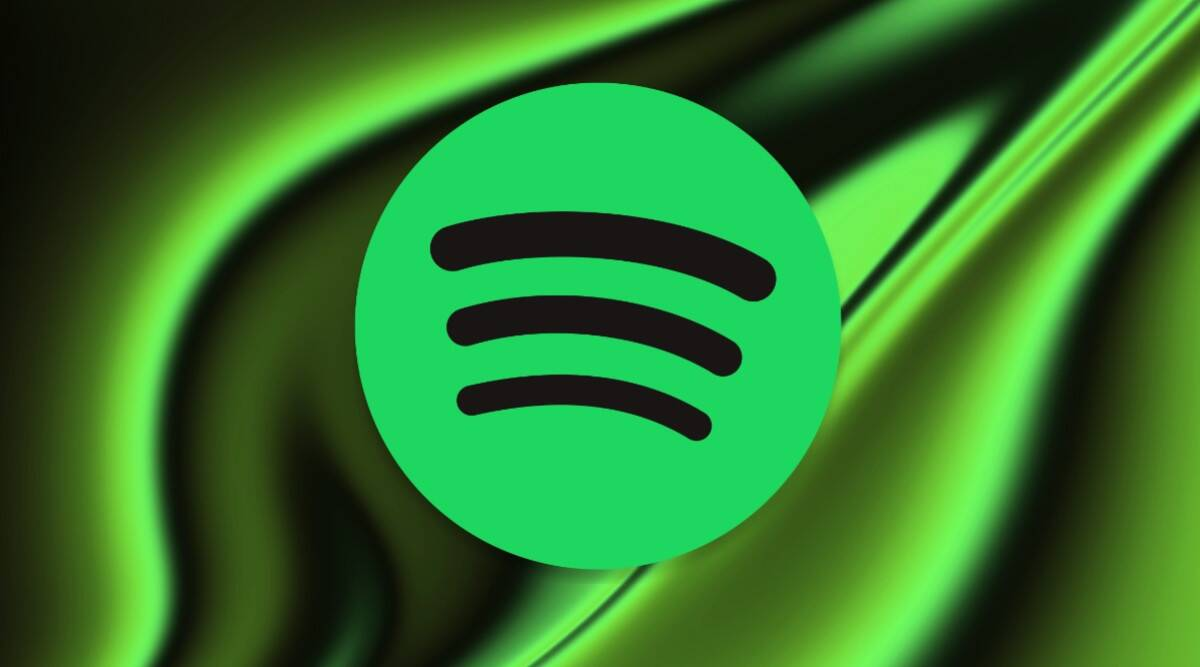
</div>

# Import Libraries

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
from pprint import pprint
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor


In [196]:
%pwd

'/content'

# Load Spotify Dataset (CSV file)

In [197]:
spotify_df = pd.read_csv("Spotfiy_Persian_Artists.csv")
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps us to better understand the given data, so that we can make sense out of it. If EDA is not done properly, it can hamper the further steps in the machine learning model building process. On the other hand, if done well, it may improve the efficacy of everything we do next. In order to perform EDA, we need to follow a systematic approach that involves several techniques. The following are some of the key steps involved in EDA:

1. Data Sourcing: This is the very first step of EDA, where we access data and load it into our system.

2. Data Cleaning: Once we have the data, we need to clean it by removing any inconsistencies, missing values, or outliers.

3. Univariate Analysis: In this step, we analyze each variable in isolation to understand its distribution, central tendency, and spread.

4. Bivariate Analysis: Here, we analyze the relationship between two variables to understand how they are related to each other.

5. Multivariate Analysis: This step involves analyzing the relationship between multiple variables to understand how they are related to each other.

By conducting EDA, we can turn an almost unusable dataset into a completely usable one. EDA helps to clean up a dataset and gives us a better understanding of the variables and the relationships between them. It is a creative process that involves generating questions about the data, searching for answers by visualizing, transforming, and modeling the data, and using what we learn to refine our questions and/or generate new ones.


In this section, we want to explore a bit dataset characteristics. To do so, you will answer specified questions below.

In [198]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [199]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

## Q: Get number of songs by each of the artists in descending order

In [200]:
# To be completed
song_count = spotify_df.groupby('artist_name')['track_name'].count()
sorted_artists = song_count.sort_values(ascending=False)
print(sorted_artists)


artist_name
Mohammadreza Shajarian    554
Hossein Alizadeh          545
Reza Sadeghi              507
Dariush                   465
Alireza Eftekhari         439
                         ... 
Nasser Abdollahi           22
Mohammad Golriz            17
Ebrahim Monsefi            16
Farman Fathalian           10
Koveyti Poor                9
Name: track_name, Length: 69, dtype: int64


## Q: Get the average duration of songs by each of the artists in minutes

In [201]:
# To be completed
spotify_df['duration_minutes'] = spotify_df['duration_ms'] / (1000 * 60)
avg_duration = spotify_df.groupby('artist_name')['duration_minutes'].mean()
average = avg_duration.sort_values(ascending=False)
print(average)



artist_name
Kayhan Kalhor       7.627583
Hatam Asgari        7.155098
Iraj Bastami        7.060861
Shahram Nazeri      6.852404
Hesameddin Seraj    6.720927
                      ...   
Macan Band          3.222035
Mazyar Fallahi      3.198591
Sasy                3.131618
Soheil Nafissi      3.063580
Peyman Yazdanian    2.461610
Name: duration_minutes, Length: 69, dtype: float64


## Q: list of artist's unique names

In [202]:
# To be completed
unique_artists = spotify_df['artist_name'].unique()
print(unique_artists)


['Salar Aghili' 'Mohsen Yeganeh' 'Mehdi Yarrahi' 'Mohammadreza Shajarian'
 'Morteza Pashaei' 'Hesameddin Seraj' 'Mohammad Esfahani'
 'Mohsen Chavoshi' 'Reza Sadeghi' 'Abdolhosein Mokhtabad' 'Alireza Assar'
 'Roozbeh Nematollahi' 'Hossein Alizadeh' 'Peyman Yazdanian'
 'Kayhan Kalhor' 'Siavash Ghomayshi' 'Benyamin Bahadori'
 'Alireza Eftekhari' 'Majid Akhshabi' 'Faramarz Aslani' 'Iraj Bastami'
 'Ehsan Khajeh Amiri' 'Alireza Ghorbani' 'Parviz Meshkatian'
 'Mohammad Reza Lotfi' 'Dang Show' 'Nasser Abdollahi' 'Soheil Nafissi'
 'Farhad Mehrad' 'Afshin Moghaddam' 'Koveyti Poor' 'Mohammad Golriz'
 'Abbas Ghaderi' 'Javad Yassari' 'Sattar' 'Mohsen Sharifian'
 'Babak Jahanbakhsh' 'Mazyar Fallahi' 'Mohammad Alizadeh' 'Farzad Farzin'
 'Ali Zand Vakili' 'Amirabbas Golab' 'Hamid Askari' 'Mohsen Namjoo'
 'Hamed Homayoun' 'Kaveh Deylami' 'Hatam Asgari' 'Hamid Hami'
 'Shahram Shabpareh' 'Moein' 'Hassan Shamaizadeh' 'Faramarz Assef'
 'Dariush' 'Amir Tataloo' 'Rastak' 'Macan Band' 'Sasy' 'Tohi'
 'Homayoun

## Q: Plot average duration of tracks by year






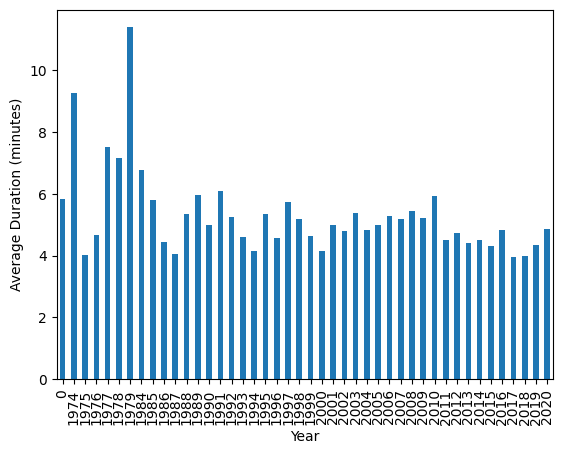

In [203]:
# To be completed
avg_duration_by_year = spotify_df.groupby('album_release_year')['duration_minutes'].mean()
avg_duration_by_year.plot(kind='bar', xlabel='Year', ylabel='Average Duration (minutes)')
plt.show()

## Q: Plot average loudness of tracks by year

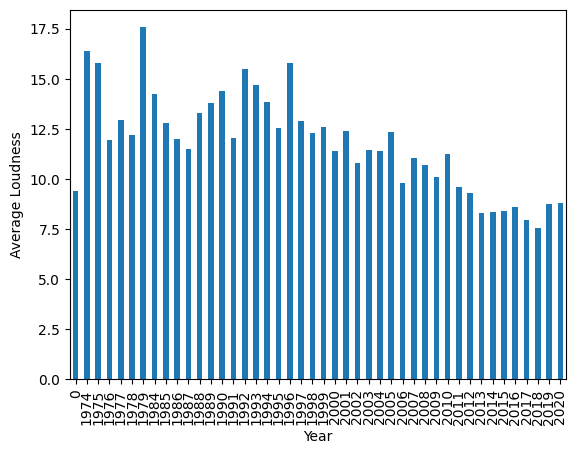

In [204]:
avg_loudness_by_year = spotify_df.groupby('album_release_year')['loudness'].mean()
avg_loudness_by_year = avg_loudness_by_year * -1
avg_loudness_by_year.plot(kind='bar', xlabel='Year', ylabel='Average Loudness')
plt.show()

## Q: Music attributes of songs over the years


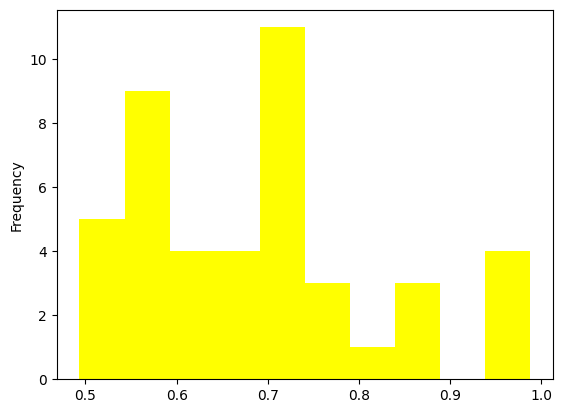

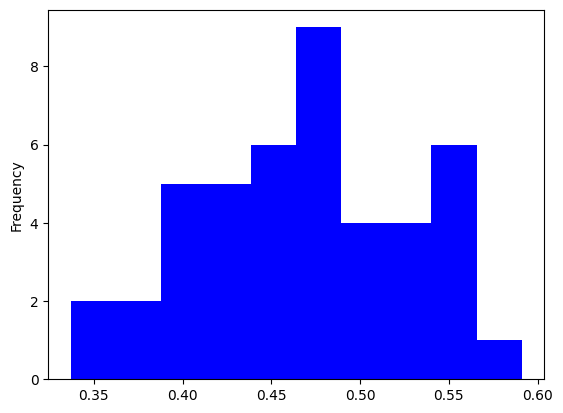

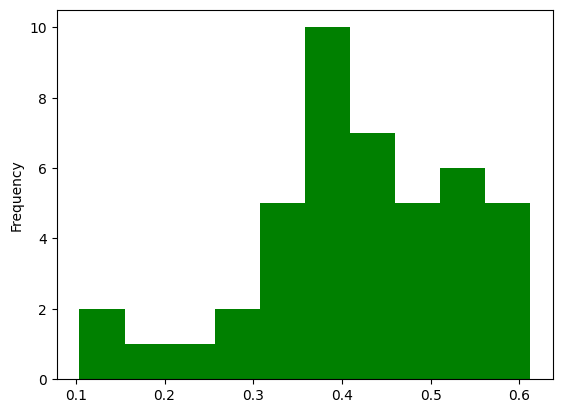

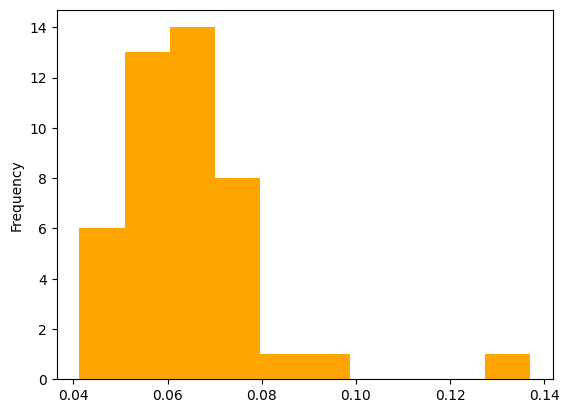

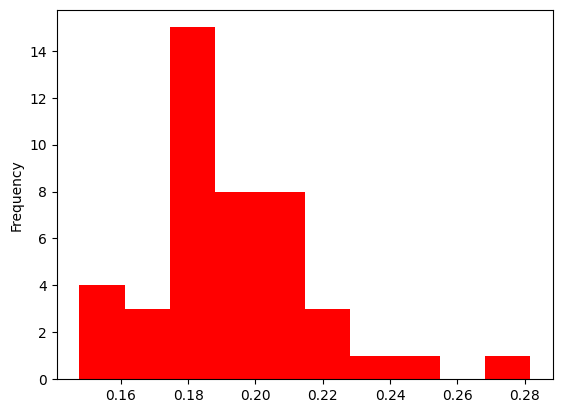

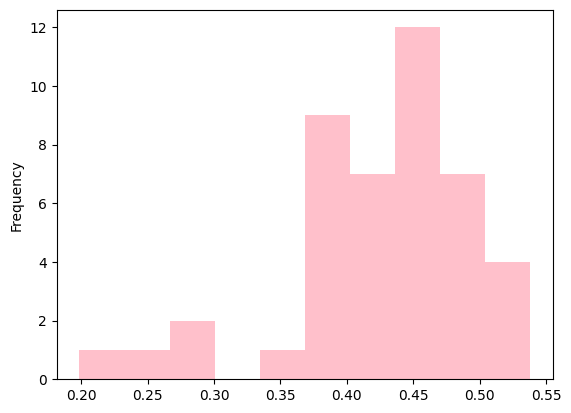

In [205]:
# the columns that we are interseted in
target_cols = ["album_release_year","acousticness","danceability","energy","speechiness","liveness","valence"]

# To be completed
spotify_df_target = spotify_df[target_cols]
spotify_df_target
avg_music_attributes_by_year = spotify_df_target.groupby('album_release_year').mean()

avg_music_attributes_by_year['acousticness'].plot(kind='hist', xlabel='album_release_year', ylabel='acousticness', color = 'yellow')
plt.show()

avg_music_attributes_by_year['danceability'].plot(kind='hist', xlabel='album_release_year', ylabel='danceability', color = 'blue')
plt.show()

avg_music_attributes_by_year['energy'].plot(kind='hist', xlabel='album_release_year', ylabel='energy', color = 'green')
plt.show()

avg_music_attributes_by_year['speechiness'].plot(kind='hist', xlabel='album_release_year', ylabel='speechiness', color = 'orange')
plt.show()

avg_music_attributes_by_year['liveness'].plot(kind='hist', xlabel='album_release_year', ylabel='liveness', color = 'red')
plt.show()

avg_music_attributes_by_year['valence'].plot(kind='hist', xlabel='album_release_year', ylabel='valence', color = 'pink')
plt.show()


## Q: Plot top 10 popular tracks (Bar Chart)

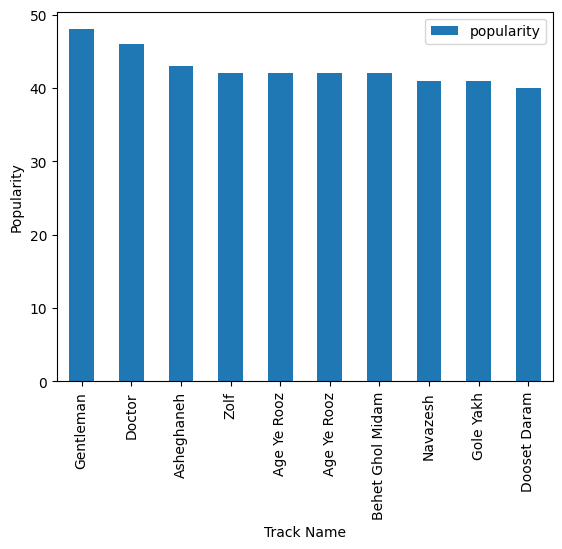

In [206]:
# To be completed
top10_tracks = spotify_df.sort_values('popularity', ascending=False).head(10)

top10_tracks.plot(kind='bar', x='track_name', y='popularity', xlabel='Track Name', ylabel='Popularity')

plt.show()

## Q: Plot top 10 popular artist (Bar Chart)

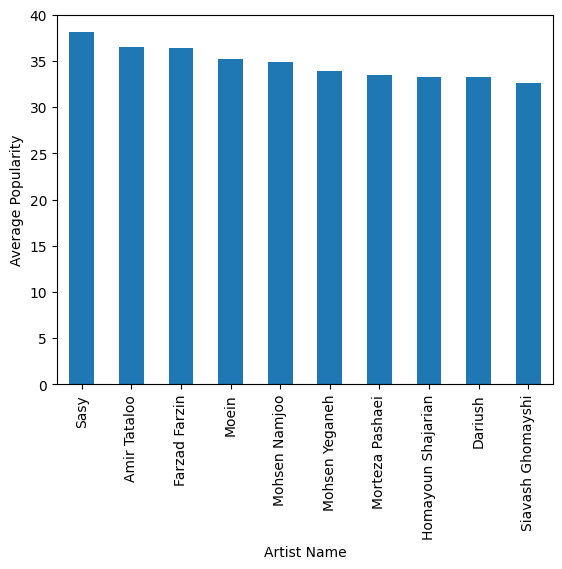

In [207]:
# To be completed
avg_popularity_by_artist = spotify_df.groupby('artist_name')['popularity'].mean()
top10_artists = avg_popularity_by_artist.sort_values(ascending=False).head(10)
top10_artists.plot(kind='bar', xlabel='Artist Name', ylabel='Average Popularity')
plt.show()

## Q: Plot correlation matrix's heatmap


What are the most correlated features with `duration_ms` and `popularity`?

<ipython-input-208-69dce00d0d82>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = spotify_df.corr()


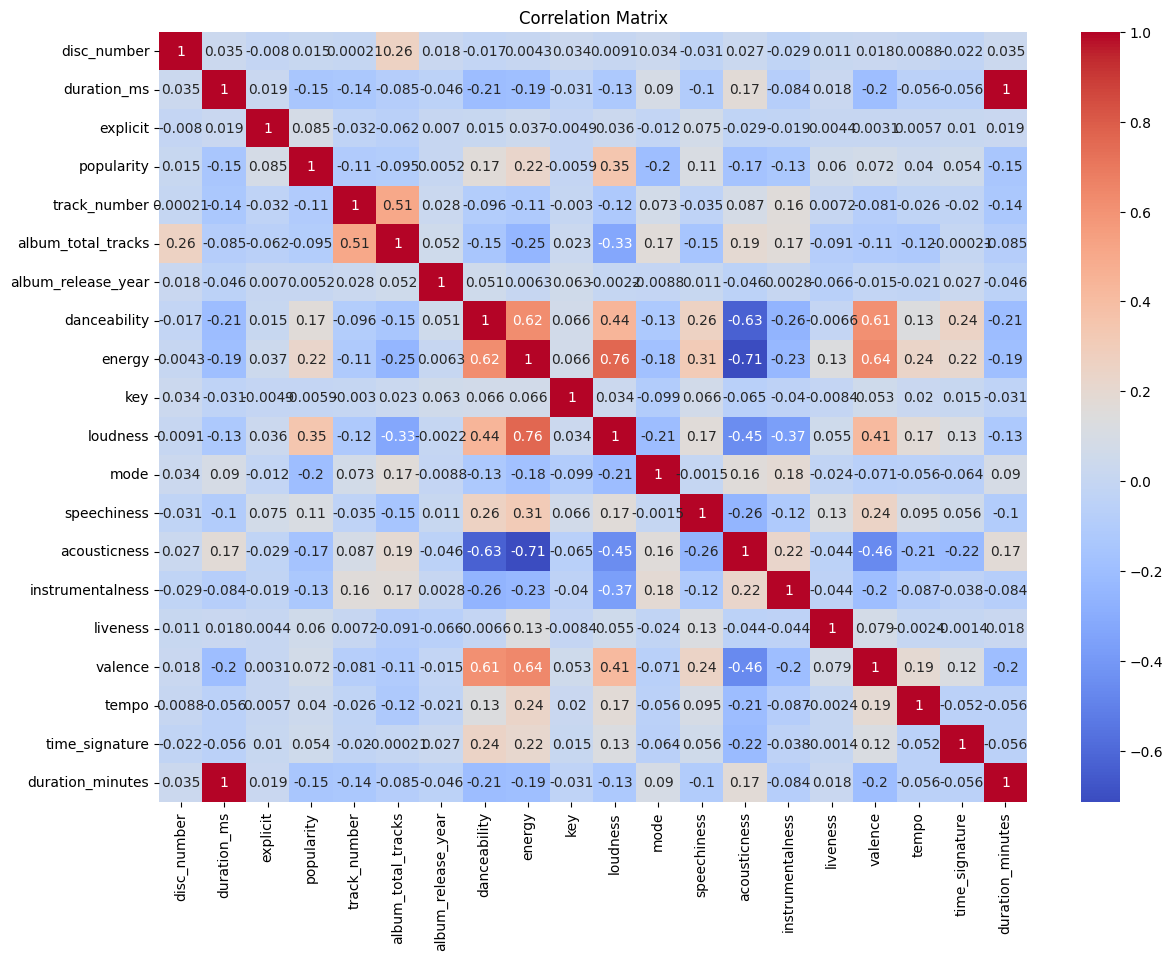

In [208]:

correlation_matrix = spotify_df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [209]:
# To be completed
#most correlated with duration_ms

correlation_with_target = correlation_matrix['duration_ms'].sort_values(ascending=False)
most_correlated_features = correlation_with_target[1:6]
print("most correlated with duration_ms are :")
print(most_correlated_features)
print("---------------------------------------------")

#most correlated with popularity

correlation_with_target = correlation_matrix['popularity'].sort_values(ascending=False)
most_correlated_features = correlation_with_target[1:6]
print("most correlated with popularity are :")
print(most_correlated_features)


most correlated with duration_ms are :
duration_minutes    1.000000
acousticness        0.170713
mode                0.089504
disc_number         0.035092
explicit            0.018728
Name: duration_ms, dtype: float64
---------------------------------------------
most correlated with popularity are :
loudness        0.345591
energy          0.223515
danceability    0.166421
speechiness     0.114274
explicit        0.085311
Name: popularity, dtype: float64


## Q: Plot box-plot for each feature




Compare box-plot values of `energy` and `liveness`

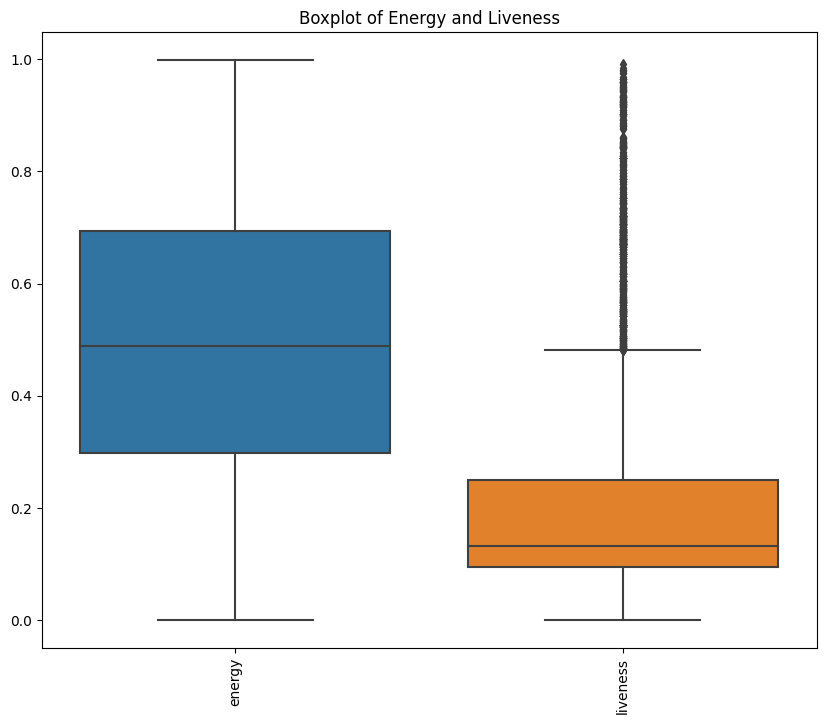

In [210]:
columns_of_interest = ['energy', 'liveness']
subset_df = spotify_df[columns_of_interest]


plt.figure(figsize=(10, 8))
sns.boxplot(data=subset_df)
plt.title('Boxplot of Energy and Liveness')
plt.xticks(rotation=90)
plt.show()

## Q: Missing values
How many `nan` values are there in each column?

In [211]:
# To be completed
nan_counts = spotify_df.isna().sum()
print('NaN counts per column:')
print(nan_counts)

NaN counts per column:
track_id                  0
disc_number               0
duration_ms               0
explicit                  0
track_name                0
track_name_farsi      10020
artist_name               0
artist_name_farsi         0
popularity             9701
track_number              0
album_href             9701
album_id                  0
album_name                0
album_release_date        0
album_total_tracks     9701
album_release_year        0
track_href                0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
key_name                144
mode_name               144
key_mode                144
duration_minutes          0
dtype: int64


`# Handling nan values of dataframe
- Fill categorical features with "None"
- Fill numerical features with appropriate approach(mean, median or any imputation). Explain your choice.

In [212]:
# To be completed
for column in spotify_df.select_dtypes(include=["object", "category"]):
    if spotify_df[column].isnull().any():
        spotify_df[column].fillna("None", inplace=True)
spotify_df

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode,duration_minutes
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,None,Salar Aghili,سالار عقیلی,NaN,1,...,0.839,0.000035,0.1360,0.3300,131.913,3,C,minor,C minor,7.448000
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,None,Salar Aghili,سالار عقیلی,NaN,2,...,0.970,0.000360,0.0812,0.3460,105.634,4,F,major,F major,14.198667
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,None,Salar Aghili,سالار عقیلی,NaN,3,...,0.664,0.002070,0.1100,0.5010,94.651,5,F,minor,F minor,4.886000
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,None,Salar Aghili,سالار عقیلی,NaN,4,...,0.915,0.006580,0.2120,0.4450,110.967,5,D,minor,D minor,10.812000
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,None,Salar Aghili,سالار عقیلی,NaN,5,...,0.657,0.000008,0.1200,0.4100,148.053,1,C,minor,C minor,4.558000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,4pEbf7VQrO4StzbqdFOnr5,1,397505,False,Zarbie Bayat Tork (Che Danestam),None,Shahram Nazeri,شهرام ناظري,NaN,19,...,0.946,0.005460,0.3530,0.3960,146.591,5,E,minor,E minor,6.625083
10628,6umKGf6TO7aRXvJWkP6WSy,1,3522173,False,Conserte Asatid,None,Shahram Nazeri,شهرام ناظري,NaN,1,...,0.982,0.061400,0.6670,0.1610,72.379,3,F,minor,F minor,58.702883
10629,5KiMQApCqUVNObTO004MWI,1,3402706,False,Soofi Nameh,None,Shahram Nazeri,شهرام ناظري,NaN,1,...,0.883,0.019400,0.2630,0.1390,86.645,4,G#,major,G# major,56.711767
10630,4w1VKm2kjmA2Xz4YSMBfIn,1,3342733,False,Saghi Nameh,None,Shahram Nazeri,شهرام ناظري,NaN,1,...,0.842,0.223000,0.7980,0.2100,77.819,3,G#,major,G# major,55.712217


استفاده از median بهتز است برای بعضی feature ها به دلیل اینکه mean به outlier ها حساس است ولی median زیاد حساس نیست.

In [213]:
# To be completed
for column in spotify_df.select_dtypes(include=["number", "integer"]):
    if spotify_df[column].isnull().any():
        median = spotify_df[column].median()
        spotify_df[column].fillna(median, inplace=True)

spotify_df

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode,duration_minutes
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,None,Salar Aghili,سالار عقیلی,20.0,1,...,0.839,0.000035,0.1360,0.3300,131.913,3,C,minor,C minor,7.448000
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,None,Salar Aghili,سالار عقیلی,20.0,2,...,0.970,0.000360,0.0812,0.3460,105.634,4,F,major,F major,14.198667
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,None,Salar Aghili,سالار عقیلی,20.0,3,...,0.664,0.002070,0.1100,0.5010,94.651,5,F,minor,F minor,4.886000
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,None,Salar Aghili,سالار عقیلی,20.0,4,...,0.915,0.006580,0.2120,0.4450,110.967,5,D,minor,D minor,10.812000
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,None,Salar Aghili,سالار عقیلی,20.0,5,...,0.657,0.000008,0.1200,0.4100,148.053,1,C,minor,C minor,4.558000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,4pEbf7VQrO4StzbqdFOnr5,1,397505,False,Zarbie Bayat Tork (Che Danestam),None,Shahram Nazeri,شهرام ناظري,20.0,19,...,0.946,0.005460,0.3530,0.3960,146.591,5,E,minor,E minor,6.625083
10628,6umKGf6TO7aRXvJWkP6WSy,1,3522173,False,Conserte Asatid,None,Shahram Nazeri,شهرام ناظري,20.0,1,...,0.982,0.061400,0.6670,0.1610,72.379,3,F,minor,F minor,58.702883
10629,5KiMQApCqUVNObTO004MWI,1,3402706,False,Soofi Nameh,None,Shahram Nazeri,شهرام ناظري,20.0,1,...,0.883,0.019400,0.2630,0.1390,86.645,4,G#,major,G# major,56.711767
10630,4w1VKm2kjmA2Xz4YSMBfIn,1,3342733,False,Saghi Nameh,None,Shahram Nazeri,شهرام ناظري,20.0,1,...,0.842,0.223000,0.7980,0.2100,77.819,3,G#,major,G# major,55.712217


# Determine your desired features here

In [214]:
music_feature_cols = ['valence', 'energy','loudness','danceability']
music_feature_cols2 = ['disc_number', 'explicit', 'track_number',
       'album_release_year', 'album_total_tracks', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']

In [215]:
tracks_feature_df = spotify_df[music_feature_cols + ['artist_name']].dropna()
tracks_feature_df2 = spotify_df[music_feature_cols2 + ['artist_name']].dropna()
tracks_feature_df2

,disc_number,explicit,track_number,album_release_year,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name
0,1,False,1,2020,10.0,0.437,0.390,0,-7.170,0,0.0299,0.839,0.000035,0.1360,0.3300,131.913,Salar Aghili
1,1,False,2,2020,10.0,0.379,0.146,5,-10.008,1,0.0414,0.970,0.000360,0.0812,0.3460,105.634,Salar Aghili
2,1,False,3,2020,10.0,0.437,0.453,5,-5.392,0,0.0349,0.664,0.002070,0.1100,0.5010,94.651,Salar Aghili
3,1,False,4,2020,10.0,0.488,0.138,2,-12.287,0,0.0451,0.915,0.006580,0.2120,0.4450,110.967,Salar Aghili
4,1,False,5,2020,10.0,0.301,0.443,0,-5.702,0,0.0334,0.657,0.000008,0.1200,0.4100,148.053,Salar Aghili
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,1,False,19,1985,10.0,0.356,0.499,4,-10.805,0,0.0452,0.946,0.005460,0.3530,0.3960,146.591,Shahram Nazeri
10628,1,False,1,2008,10.0,0.318,0.163,5,-17.538,0,0.0690,0.982,0.061400,0.6670,0.1610,72.379,Shahram Nazeri
10629,1,False,1,2008,10.0,0.213,0.218,8,-15.865,1,0.0350,0.883,0.019400,0.2630,0.1390,86.645,Shahram Nazeri
10630,1,False,1,2008,10.0,0.242,0.304,8,-13.286,1,0.0369,0.842,0.223000,0.7980,0.2100,77.819,Shahram Nazeri


## Feature Preprocessing
In this section, you should preprocess desired features to get suitable for using in machine learning models.

In [216]:
scaler = StandardScaler()
features_numerical = ['valence', 'loudness','energy','danceability']
features_numerical2 = ['disc_number', 'explicit', 'track_number',
       'album_release_year', 'album_total_tracks', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']
tracks_feature_df[features_numerical] = scaler.fit_transform(tracks_feature_df[features_numerical])
tracks_feature_df2[features_numerical2] = scaler.fit_transform(tracks_feature_df2[features_numerical2])

tracks_feature_df2

,disc_number,explicit,track_number,album_release_year,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name
0,-0.179174,-0.044487,-1.009513,0.164880,0.012815,-0.428643,-0.440144,-1.432162,0.629863,-0.772888,-0.561985,0.721928,-0.448047,-0.369816,-0.504217,0.420102,Salar Aghili
1,-0.179174,-0.044487,-0.788916,0.164880,0.012815,-0.765201,-1.449424,-0.056665,0.013646,1.293849,-0.400182,1.134163,-0.446904,-0.723920,-0.437288,-0.460848,Salar Aghili
2,-0.179174,-0.044487,-0.568319,0.164880,0.012815,-0.428643,-0.179551,-0.056665,1.015921,-0.772888,-0.491636,0.171232,-0.440888,-0.537822,0.211093,-0.829030,Salar Aghili
3,-0.179174,-0.044487,-0.347722,0.164880,0.012815,-0.132704,-1.482515,-0.881964,-0.481195,-0.772888,-0.348124,0.961087,-0.425022,0.121278,-0.023160,-0.282070,Salar Aghili
4,-0.179174,-0.044487,-0.127125,0.164880,0.012815,-1.217813,-0.220915,-1.432162,0.948610,-0.772888,-0.512741,0.149205,-0.448140,-0.473204,-0.169569,0.961163,Salar Aghili
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,-0.179174,-0.044487,2.961232,0.014256,0.012815,-0.898663,0.010723,-0.331765,-0.159407,-0.772888,-0.346717,1.058639,-0.428962,1.032386,-0.228132,0.912152,Shahram Nazeri
10628,-0.179174,-0.044487,-1.009513,0.113238,0.012815,-1.119167,-1.379105,-0.056665,-1.621347,-0.772888,-0.011856,1.171925,-0.232174,3.061378,-1.211161,-1.575654,Shahram Nazeri
10629,-0.179174,-0.044487,-1.009513,0.113238,0.012815,-1.728453,-1.151603,0.768633,-1.258088,1.293849,-0.490229,0.860389,-0.379924,0.450827,-1.303190,-1.097415,Shahram Nazeri
10630,-0.179174,-0.044487,-1.009513,0.113238,0.012815,-1.560174,-0.795874,0.768633,-0.698108,1.293849,-0.463496,0.731369,0.336312,3.907869,-1.006189,-1.393289,Shahram Nazeri


## Visualize Dataset Features using Dimension Reduction models (e.g. PCA)

(10632, 2)


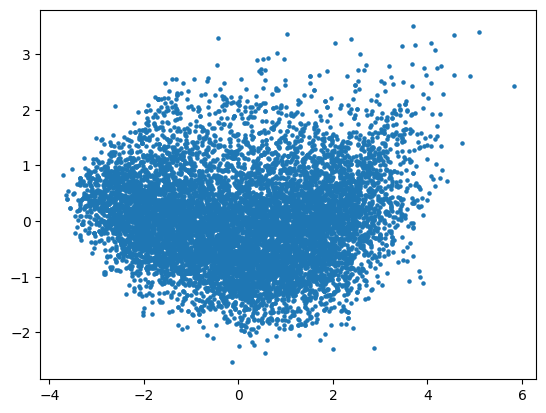

In [217]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)

(10632, 3)


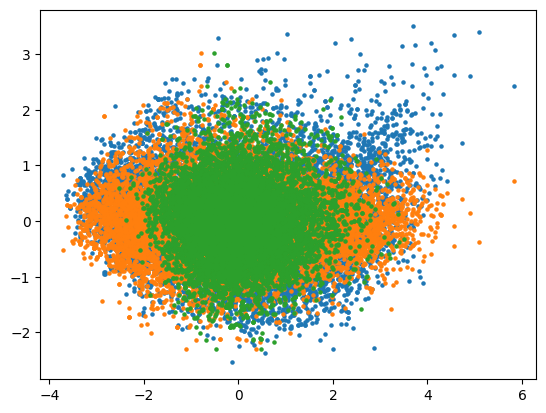

In [218]:
pca = PCA(n_components=3)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 2], s=5)
plt.scatter(tracks_feature_visual[:, 1], tracks_feature_visual[:, 2], s=5)

## Regression

In [219]:
# Set random seed to make results reproducible
RANDOM_SEED = 42

In [220]:
df = spotify_df
regression_features = ['danceability', 'loudness','energy']
regression_features2 = ['disc_number', 'explicit', 'track_number',
       'album_release_year', 'album_total_tracks', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']
x=df.loc[:, regression_features].values
y=df.loc[:,'popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_SEED)

In this section, you should use `LinearRegression` class in scikit-learn library to implement regression algorithm. note that you should pass suitable parameters to get better results.

In [221]:
regressor = LinearRegression(
)
regressor.fit(x_train, y_train)
print(regressor.score(x_train,y_train))
print(regressor.intercept_)
print(regressor.coef_)

0.010166456164876658
20.876161911897345
[ 0.57090583  0.08326269 -0.65753797]


## Evaluate Regression Algorithm

In [222]:
y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_output

,Actual,Predicted
0,13.0,20.118779
1,20.0,20.338719
2,20.0,20.327948
3,20.0,19.991386
4,20.0,20.024049
...,...,...
3185,20.0,20.317135
3186,12.0,19.941893
3187,20.0,19.407203
3188,20.0,20.008394


In [223]:
#autograde
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9446038253983117
Mean Squared Error: 8.826210911883122
Root Mean Squared Error: 2.970893958370632


# Classification

## Prepare Labels

In [224]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh',
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani',
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami',
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

## Add `is_sonnati` feature column
Using `sonnati_artist` list, add new feature column `is_sonnati` that determines a song whether a song is sonnati

In [225]:
# To be completed
tracks_feature_df['is_sonnati'] = tracks_feature_df['artist_name'].apply(lambda x: 1 if x in sonnati_artists else 0)
tracks_feature_df2['is_sonnati'] = tracks_feature_df2['artist_name'].apply(lambda x: 1 if x in sonnati_artists else 0)


In [226]:
tracks_feature_df.describe()
tracks_feature_df2

,disc_number,explicit,track_number,album_release_year,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_name,is_sonnati
0,-0.179174,-0.044487,-1.009513,0.164880,0.012815,-0.428643,-0.440144,-1.432162,0.629863,-0.772888,-0.561985,0.721928,-0.448047,-0.369816,-0.504217,0.420102,Salar Aghili,1
1,-0.179174,-0.044487,-0.788916,0.164880,0.012815,-0.765201,-1.449424,-0.056665,0.013646,1.293849,-0.400182,1.134163,-0.446904,-0.723920,-0.437288,-0.460848,Salar Aghili,1
2,-0.179174,-0.044487,-0.568319,0.164880,0.012815,-0.428643,-0.179551,-0.056665,1.015921,-0.772888,-0.491636,0.171232,-0.440888,-0.537822,0.211093,-0.829030,Salar Aghili,1
3,-0.179174,-0.044487,-0.347722,0.164880,0.012815,-0.132704,-1.482515,-0.881964,-0.481195,-0.772888,-0.348124,0.961087,-0.425022,0.121278,-0.023160,-0.282070,Salar Aghili,1
4,-0.179174,-0.044487,-0.127125,0.164880,0.012815,-1.217813,-0.220915,-1.432162,0.948610,-0.772888,-0.512741,0.149205,-0.448140,-0.473204,-0.169569,0.961163,Salar Aghili,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,-0.179174,-0.044487,2.961232,0.014256,0.012815,-0.898663,0.010723,-0.331765,-0.159407,-0.772888,-0.346717,1.058639,-0.428962,1.032386,-0.228132,0.912152,Shahram Nazeri,1
10628,-0.179174,-0.044487,-1.009513,0.113238,0.012815,-1.119167,-1.379105,-0.056665,-1.621347,-0.772888,-0.011856,1.171925,-0.232174,3.061378,-1.211161,-1.575654,Shahram Nazeri,1
10629,-0.179174,-0.044487,-1.009513,0.113238,0.012815,-1.728453,-1.151603,0.768633,-1.258088,1.293849,-0.490229,0.860389,-0.379924,0.450827,-1.303190,-1.097415,Shahram Nazeri,1
10630,-0.179174,-0.044487,-1.009513,0.113238,0.012815,-1.560174,-0.795874,0.768633,-0.698108,1.293849,-0.463496,0.731369,0.336312,3.907869,-1.006189,-1.393289,Shahram Nazeri,1


## Create Classification Dataset

In [227]:
label_encoder = LabelEncoder()
#tracks_feature_df['artist_name'] = label_encoder.fit_transform(tracks_feature_df['artist_name'])
tracks_feature_df2['artist_name'] = label_encoder.fit_transform(tracks_feature_df2['artist_name'])

#x = tracks_feature_df.reset_index().drop(columns=['is_sonnati','artist_name','valence']).values
x = tracks_feature_df2.reset_index().drop(columns=['is_sonnati','artist_name']).values
y = tracks_feature_df2['is_sonnati'].values

tracks_feature_df2
print(y)

[1 1 1 ... 1 1 1]


In [228]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(10632, 17)
y.shape=(10632,)


In [229]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=RANDOM_SEED, shuffle=True)

## Choose a Model and Report the Evaluation Metrics

`fit_and_eval` function takes two parameters:
- scikit-learn classification model
- dataset object (that is a tuple of `x` and `y`)


you should just instantiate your model and pass your desired parameters and then get the result of testing over test part of dataset.

In [230]:
#autograde
def fit_and_eval(model, dataset):
    """
    Train scikit-learn model on given dataset

    model: scikit-learn model
    dataset: tuple of x's and y's (whole data without any split)

    return:
        dict: evaluation metrics report
    """
    eval_metrics = {}
    x, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True
    )

    # train model
    classifier = make_pipeline(StandardScaler(), model)

    # ignore index column for training and inferencing
    classifier.fit(x_train[:, 1:], y_train)
    y_pred = classifier.predict(x_test[:, 1:])

    # export predictions to submit to kaggle
    pd.DataFrame({'id': x_test[:, 0].astype(int), 'predicted': y_pred}, dtype=str).to_csv('spotify_pred.csv', index=False)

    # evaluate model
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['f1'] = f1_score(y_test, y_pred)
    eval_metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return eval_metrics

In [231]:
# here is an example
dataset = (x, y)
pprint(fit_and_eval(SVC(), dataset))

{'acc': 0.8407523510971787,
 'confusion': array([[1815,  280],
       [ 228,  867]]),
 'f1': 0.7734165923282783,
 'precision': 0.7558849171752398,
 'recall': 0.7917808219178082}


In [232]:
#autograde
pprint(fit_and_eval(RandomForestClassifier(n_estimators=1000, max_depth=200, random_state=42), dataset))

{'acc': 0.8793103448275862,
 'confusion': array([[1909,  186],
       [ 199,  896]]),
 'f1': 0.8231511254019293,
 'precision': 0.8280961182994455,
 'recall': 0.8182648401826484}


In [233]:
pprint(fit_and_eval(KNeighborsClassifier(n_neighbors=5), dataset))

{'acc': 0.8235109717868339,
 'confusion': array([[1775,  320],
       [ 243,  852]]),
 'f1': 0.7516541685046317,
 'precision': 0.726962457337884,
 'recall': 0.7780821917808219}


In [234]:
dataset = (x, y)
pprint(fit_and_eval(AdaBoostClassifier(n_estimators=200), dataset))

{'acc': 0.8573667711598746,
 'confusion': array([[1855,  240],
       [ 215,  880]]),
 'f1': 0.7945823927765238,
 'precision': 0.7857142857142857,
 'recall': 0.8036529680365296}


In [235]:
dataset = (x, y)
pprint(fit_and_eval(MLPClassifier(), dataset))

{'acc': 0.8482758620689655,
 'confusion': array([[1816,  279],
       [ 205,  890]]),
 'f1': 0.7862190812720847,
 'precision': 0.7613344739093242,
 'recall': 0.8127853881278538}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
